# COMP9318 Project
## Exploratory Data Analysis

In [1]:
import helper as h
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pandas2arff

Read in word data:

In [2]:
data_loc = 'asset/training_data.txt'
words = h.get_words(data_loc)
words.head()

,word,pronunciation,pn_list,destressed_pn_list,primary_stress_map,secondary_stress_map,vowel_map,consonant_map,vector_map,vowel_count,consonant_count,type_tag,1st_letter_idx,phoneme_length,prefix,suffix,primary_stress_idx,stressed_vowel
0,COED,K OW1 EH2 D,"[K, OW1, EH2, D]","[K, OW, EH, D]","[0, 1, 0, 0]","[0, 0, 1, 0]","[0, 1, 1, 0]","[1, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",2,2,NN,3,4,1,1,2,OW
1,PURVIEW,P ER1 V Y UW2,"[P, ER1, V, Y, UW2]","[P, ER, V, Y, UW]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 1]","[0, 1, 0, 0, 1]","[1, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",2,3,NN,16,5,1,0,2,ER
2,HEHIR,HH EH1 HH IH0 R,"[HH, EH1, HH, IH0, R]","[HH, EH, HH, IH, R]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 1, 0, 1, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,3,NN,8,5,0,0,2,EH
3,MUSCLING,M AH1 S AH0 L IH0 NG,"[M, AH1, S, AH0, L, IH0, NG]","[M, AH, S, AH, L, IH, NG]","[0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",3,4,NN,13,7,0,1,2,AH
4,NONPOISONOUS,N AA0 N P OY1 Z AH0 N AH0 S,"[N, AA0, N, P, OY1, Z, AH0, N, AH0, S]","[N, AA, N, P, OY, Z, AH, N, AH, S]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 1, 0, 1, 0, 1, 0]","[1, 0, 1, 1, 0, 1, 0, 1, 0, 1]","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",4,6,NN,14,10,1,1,5,OY


In [3]:
words.columns

Index(['word', 'pronunciation', 'pn_list', 'destressed_pn_list',
       'primary_stress_map', 'secondary_stress_map', 'vowel_map',
       'consonant_map', 'vector_map', 'vowel_count', 'consonant_count',
       'type_tag', '1st_letter_idx', 'phoneme_length', 'prefix', 'suffix',
       'primary_stress_idx', 'stressed_vowel'],
      dtype='object')

### Facts

Most common stressed vowel in descending order.  

In [10]:
stressed_vowel_count = words.groupby('stressed_vowel')['word'].count().sort_values(ascending=False)


('AA',
 'AE',
 'AH',
 'AO',
 'AW',
 'AY',
 'EH',
 'ER',
 'EY',
 'IH',
 'IY',
 'OW',
 'OY',
 'UH',
 'UW')

### Plots

In [5]:
%matplotlib inline


def scatter_plot(x,y):
    fig = plt.figure()
    ax  = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    plt.title("{} vs {}".format(y.name,x.name))
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    return

def histogram(data,bins_count):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist(data,bins=bins_count)
    plt.title('{} Distribution'.format(data.name))
    plt.xlabel('{}'.format(data.name))
    plt.show()
    return
    

In [6]:
words[words['type_tag']=='NN']

,word,pronunciation,pn_list,destressed_pn_list,primary_stress_map,secondary_stress_map,vowel_map,consonant_map,vector_map,vowel_count,consonant_count,type_tag,1st_letter_idx,phoneme_length,prefix,suffix,primary_stress_idx,stressed_vowel
0,COED,K OW1 EH2 D,"[K, OW1, EH2, D]","[K, OW, EH, D]","[0, 1, 0, 0]","[0, 0, 1, 0]","[0, 1, 1, 0]","[1, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",2,2,NN,3,4,1,1,2,OW
1,PURVIEW,P ER1 V Y UW2,"[P, ER1, V, Y, UW2]","[P, ER, V, Y, UW]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 1]","[0, 1, 0, 0, 1]","[1, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",2,3,NN,16,5,1,0,2,ER
2,HEHIR,HH EH1 HH IH0 R,"[HH, EH1, HH, IH0, R]","[HH, EH, HH, IH, R]","[0, 1, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 1, 0, 1, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,3,NN,8,5,0,0,2,EH
3,MUSCLING,M AH1 S AH0 L IH0 NG,"[M, AH1, S, AH0, L, IH0, NG]","[M, AH, S, AH, L, IH, NG]","[0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 0, 1, 0]","[1, 0, 1, 0, 1, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",3,4,NN,13,7,0,1,2,AH
4,NONPOISONOUS,N AA0 N P OY1 Z AH0 N AH0 S,"[N, AA0, N, P, OY1, Z, AH0, N, AH0, S]","[N, AA, N, P, OY, Z, AH, N, AH, S]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 1, 0, 1, 0, 1, 0]","[1, 0, 1, 1, 0, 1, 0, 1, 0, 1]","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",4,6,NN,14,10,1,1,5,OY
5,LAVECCHIA,L AA0 V EH1 K IY0 AH0,"[L, AA0, V, EH1, K, IY0, AH0]","[L, AA, V, EH, K, IY, AH]","[0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 0, 1, 1]","[1, 0, 1, 0, 1, 0, 0]","[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...",4,3,NN,12,7,1,1,4,EH
6,BUCKLED,B AH1 K AH0 L D,"[B, AH1, K, AH0, L, D]","[B, AH, K, AH, L, D]","[0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 0, 0]","[1, 0, 1, 0, 1, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4,NN,2,6,0,1,2,AH
7,EATEN,IY1 T AH0 N,"[IY1, T, AH0, N]","[IY, T, AH, N]","[1, 0, 0, 0]","[0, 0, 0, 0]","[1, 0, 1, 0]","[0, 1, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",2,2,NN,5,4,0,1,1,IY
8,SCIMED,S AY1 M EH2 D,"[S, AY1, M, EH2, D]","[S, AY, M, EH, D]","[0, 1, 0, 0, 0]","[0, 0, 0, 1, 0]","[0, 1, 0, 1, 0]","[1, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,3,NN,19,5,1,1,2,AY
9,ZHAMBU,Z AA0 M B UW1,"[Z, AA0, M, B, UW1]","[Z, AA, M, B, UW]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0]","[0, 1, 0, 0, 1]","[1, 0, 1, 1, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",2,3,NN,26,5,0,0,5,UW


NN


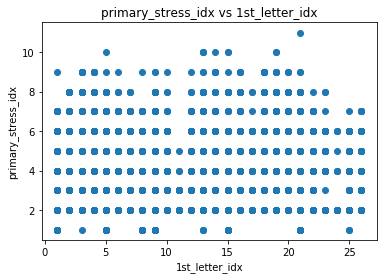

NNS


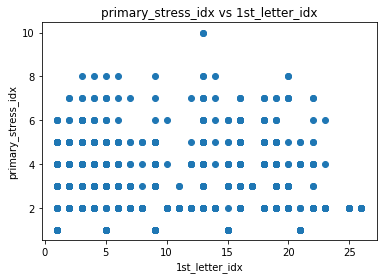

NNP


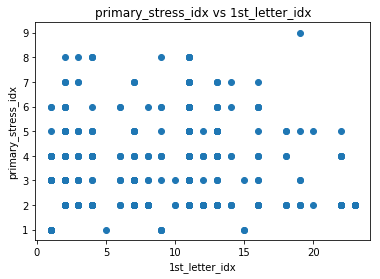

JJ


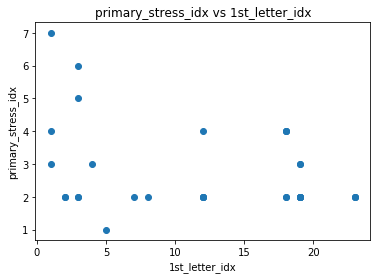

RB


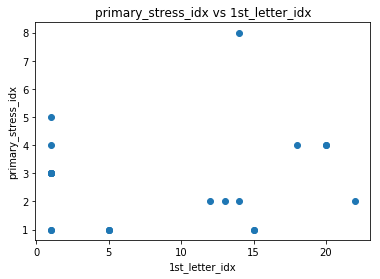

IN


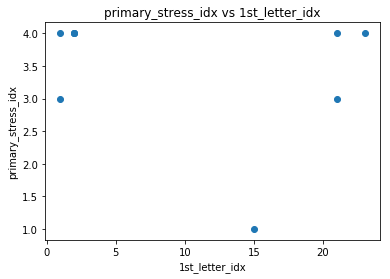

DT


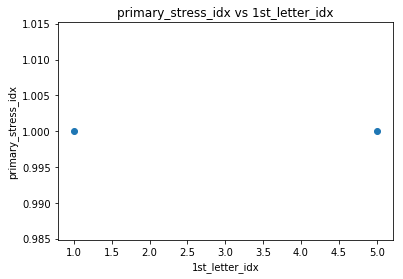

JJR


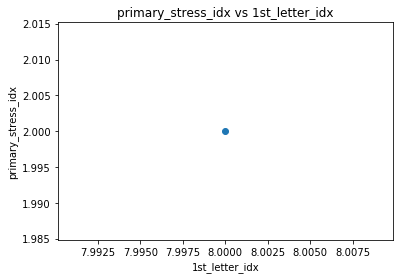

VB


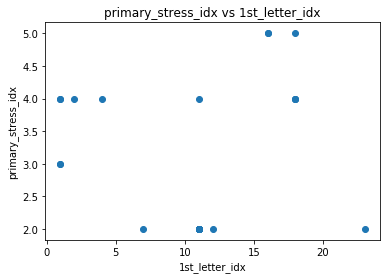

FW


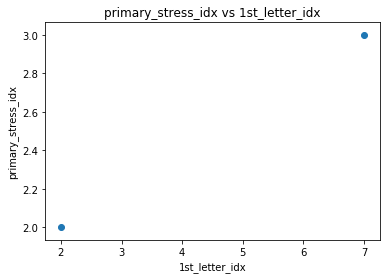

CC


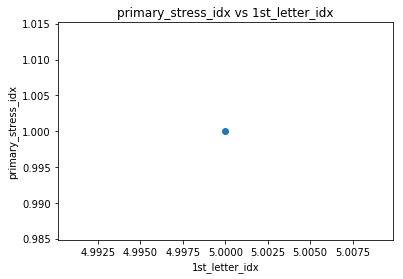

WP


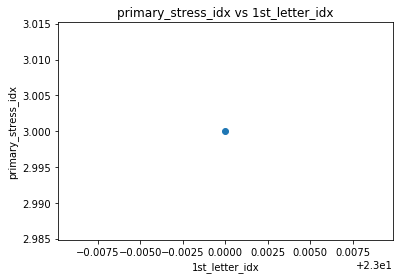

WDT


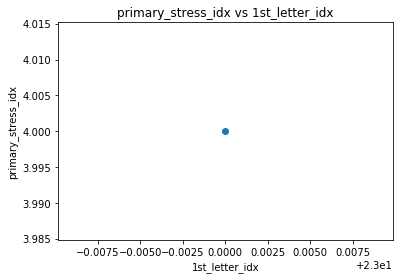

In [7]:
for tag in words.type_tag.unique():
    tag_df = words[words['type_tag'] == tag]
    print(tag)
    scatter_plot(tag_df['1st_letter_idx'], tag_df.primary_stress_idx)

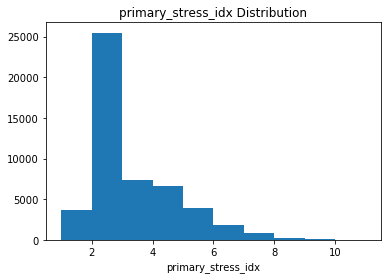

In [8]:
histogram(words.primary_stress_idx.apply(int),10)

In [14]:
pd.DataFrame(words.vector_map)
#words.vector_map

,vector_map
0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
2,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
5,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
6,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
8,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
